In [1]:
# Step 1 – Setup
# Install required libraries (in your Jupyter environment):
# pip install yfinance pandas matplotlib seaborn

In [2]:
# Step 2 – Notebook Structure
# A well-structured Jupyter Notebook outline:

In [13]:
# Stock Price Analysis
# Project 1 - Phase 1 (Python for Finance Foundation)
# Author: Rein / Pixel Sky Solutions

# --- Imports ---
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [4]:
# Step 3 – Download Data
# We’ll use Yahoo Finance API (yfinance) to grab stock data.

In [14]:
# --- Download Data ---
ticker = "AAPL"
data = yf.download(ticker, period="5y")

# Preview data
data.head()

C:\Users\moonw\AppData\Local\Temp\ipykernel_27128\4193818599.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="5y")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-09-28,111.823654,112.173833,109.703129,111.872293,137672400
2020-09-29,110.977364,112.164080,110.471554,111.424820,99382200
2020-09-30,112.650444,114.060889,110.520197,110.685557,142675200
2020-10-01,113.603737,114.508365,112.669928,114.430546,116120400
2020-10-02,109.936562,112.222454,109.158392,109.810111,144712000


In [6]:
# Step 4 – Calculate Returns & Volatility
# We compute daily returns, cumulative returns, and rolling volatility.

In [15]:
# If MultiIndex, flatten
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)

print("Columns:", data.columns)

Columns: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


In [16]:
# --- Calculate Returns ---
data['Daily Return'] = data['Close'].pct_change()
data['Cumulative Return'] = (1 + data['Daily Return']).cumprod()
data['Volatility'] = data['Daily Return'].rolling(window=30).std()

In [9]:
# Step 5 – Visualizations
# Create charts for insights.

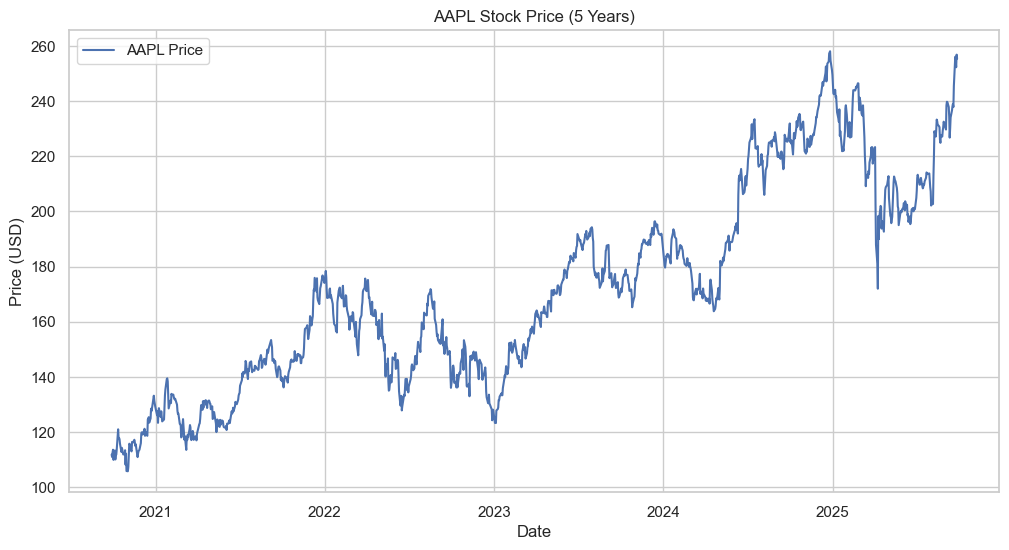

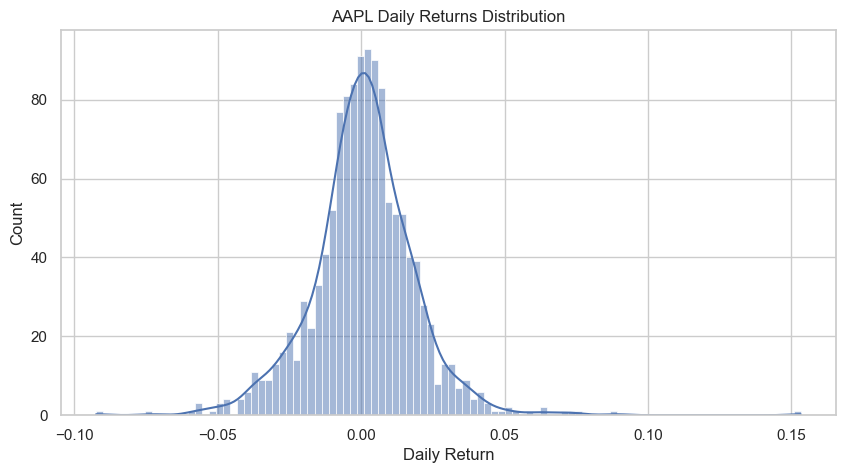

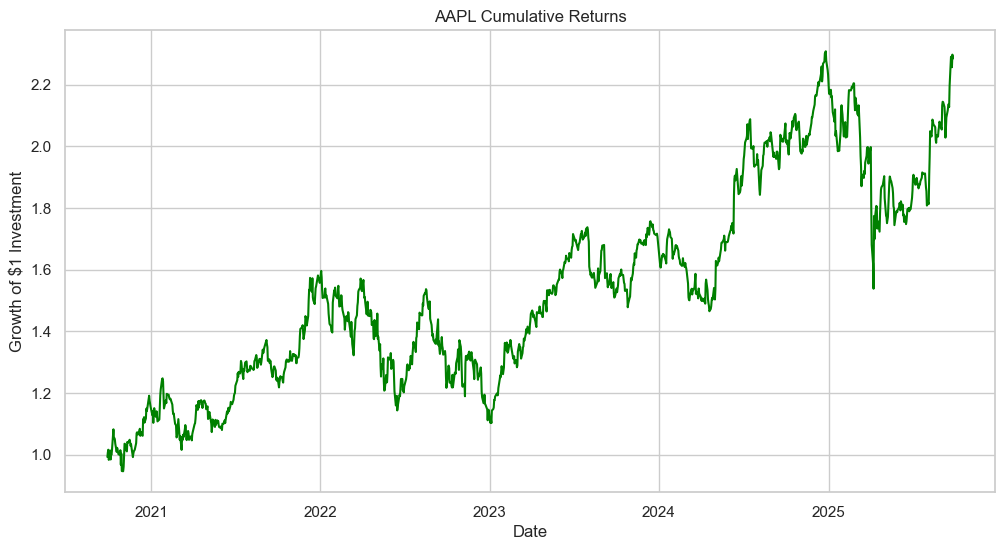

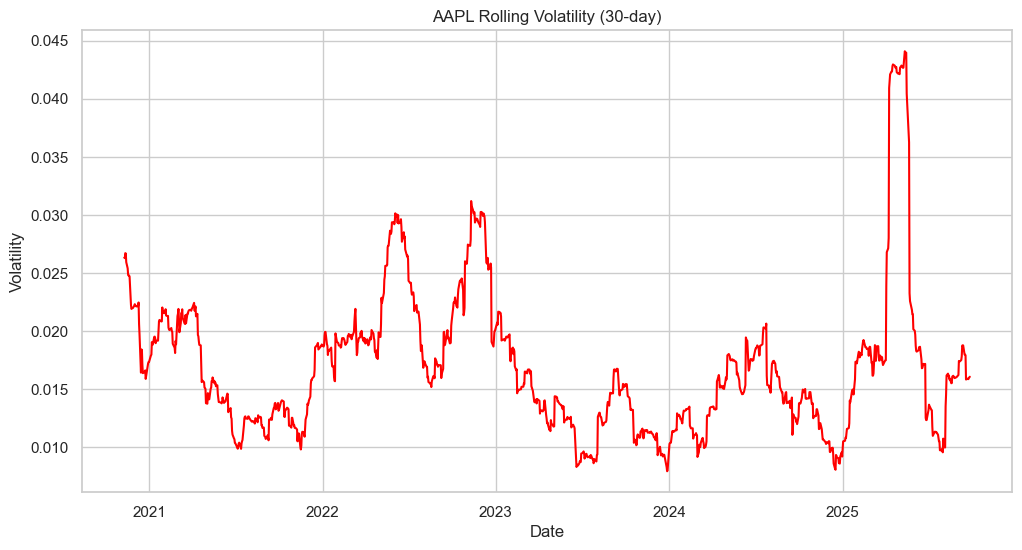

In [17]:
# --- Visualization ---
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label=f"{ticker} Price")
plt.title(f"{ticker} Stock Price (5 Years)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data['Daily Return'].dropna(), bins=100, kde=True)
plt.title(f"{ticker} Daily Returns Distribution")
plt.show()

plt.figure(figsize=(12,6))
plt.plot(data['Cumulative Return'], color="green")
plt.title(f"{ticker} Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Growth of $1 Investment")
plt.show()

plt.figure(figsize=(12,6))
plt.plot(data['Volatility'], color="red")
plt.title(f"{ticker} Rolling Volatility (30-day)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

In [11]:
# Step 6 – Wrap Up
# Add a nice summary section:

In [18]:
# --- Summary Stats ---
summary = {
    "Start Date": data.index.min().strftime("%Y-%m-%d"),
    "End Date": data.index.max().strftime("%Y-%m-%d"),
    "Total Return (%)": round((data['Cumulative Return'].iloc[-1] - 1) * 100, 2),
    "Average Daily Return (%)": round(data['Daily Return'].mean() * 100, 4),
    "Daily Volatility (%)": round(data['Daily Return'].std() * 100, 4)
}
summary

{'Start Date': '2020-09-28',
 'End Date': '2025-09-26',
 'Total Return (%)': np.float64(128.45),
 'Average Daily Return (%)': np.float64(0.0821),
 'Daily Volatility (%)': np.float64(1.8063)}

In [ ]:
cls